In [1]:
# Here we will be using the example from Nielsen of whether to attend the cheese festive or not.
# Our choice is based on 3 inputs: weather, friend, public transport
# For example input [0,1,0] means bad weather, friend available, no public transport
# A Perceptron can make this decision for us

# First we will play around with vector dot product and matrix transpose etc

# initial weights for a decision perceptron and sample inputs

import numpy as np
# sample weights vector w  and two input vectors i1 and i2
w = np.array([6,2,2])
i1 = np.array([1,0,0])
i2 = np.array([0,1,1])

# dot product of 2 vectors
w.dot(i1)

6

In [3]:
w.dot(i2)

4

In [5]:
# Put i1 and i2 into into a matrix, ecah vector will be a row.
ins = np.array([i1, i2])
print(ins)

[[1 0 0]
 [0 1 1]]


In [69]:
# why does this give errors?
# Transposed ins to shape (3, 2) to match the dimensions for dot product; 
# original gave ValueError due to shape mismatch (3,) and (2,3) not aligning.
result = w.dot(ins.T)

In [71]:
# A matrix transpose will convert rows into columnms and vice versa
print(ins.T)
w.dot(ins.T)

[[1 0]
 [0 1]
 [0 1]]


array([6, 4])

In [73]:
# Alternatively instead of using the transpose of ins, we could rearrange the dot product
ins.dot(w)

array([6, 4])

In [75]:
# Now we provide the full code for single decision perceptron for attending cheese festival or not
# 3 variable input: weather good, friend coming too, public transport
# Note that we are not training the Perceptron here. That's for the next lab

import numpy as np

def cheese_decide(input):
    weights = np.array([6,2,2])
    threshold = 5
    if weights.dot(input) > threshold:
        return 1
    else:
        return 0

In [77]:
# Perceptron favours good weather above all in deciding
cheese_decide(i1)

1

In [79]:
# with poor weather, even with a friend coimg and public transport available not enough to go
cheese_decide(i2)

0

In [81]:
# if you change threshold to 3 instead of 5, then with poor weather, friend coming and 
# public transport are enough to decide to go

def cheese_decide(input):
    weights = np.array([6,2,2])
    threshold = 3
    if weights.dot(input) > threshold:
        return 1
    else:
        return 0

cheese_decide( i2)

1

In [83]:
# redfine cheese_decide perceptron to use bias instead of threshold, i.e. instead of 
# weights.dot(input) - threshold > 0  use
# weights.dot(input) + bias >  0

def cheese_decide1(input):
    weights = np.array([6,2,2])
    bias = -3
    if weights.dot(input) + bias > 0:
        return 1
    else:
        return 0


In [85]:
cheese_decide1([1,0,0]), cheese_decide1([0,1,1]), cheese_decide1([0,0,1])

(1, 1, 0)

Exercise 1: Write a function nand(x) for a 2 input perceptron that implements logical NAND with weights -2 and -2 and bias 3. 

In [88]:
inputs = np.array([[0,0],[0,1], [1,0], [1,1]])
print(inputs)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


In [90]:
# complete the code and run it

# Define the NAND function
def nand(x):
    weights = np.array([-2, -2])  # Weights for the inputs
    bias = 3                        # Bias term
    
    # Calculate the linear output
    linear_output = np.dot(weights, x) + bias
    
    # Step activation function
    return 1 if linear_output > 0 else 0

# Test the NAND function with all inputs
print(nand(inputs[0]), nand(inputs[1]), nand(inputs[2]), nand(inputs[3]))

1 1 1 0


Exercise 2: Rewrite the function nand(x) for the 2 input perceptron that implements logical NAND with weights -2 and -2 and bias 3 except that this time all the 4 input vectos are supplied together as a 4 by 2 array. Should return 4 corresponding ouputs as a vector. This will necessitate a loop to iteration thru all the input vectors.

In [93]:
# Modify nand() so that is can process all the input vectos togethjer
# complete the code and run it

def nand(xs):  
    weights = np.array([-2, -2])  # Weights for the inputs
    bias = 3                       # Bias term
    outputs = []                   # List to hold outputs
    
    # Iterate through all input vectors
    for x in xs:
        linear_output = np.dot(weights, x) + bias
        outputs.append(1 if linear_output > 0 else 0)
    
    return np.array(outputs)  # Return outputs as a NumPy array

# Test the modified nand function
print(nand(inputs))

[1 1 1 0]


In [95]:
# Exercise: sigmoid function exercises
# write code for this activation function and test it
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Test the sigmoid function with a range of values
test_values = np.array([-5, -1, 0, 1, 5])
sigmoid_outputs = sigmoid(test_values)

# Print the outputs of the sigmoid function
print(sigmoid_outputs)

[0.00669285 0.26894142 0.5        0.73105858 0.99330715]


In [97]:
# Exercise: Matplotlib
import matplotlib as mplot
import matplotlib.pyplot as plt

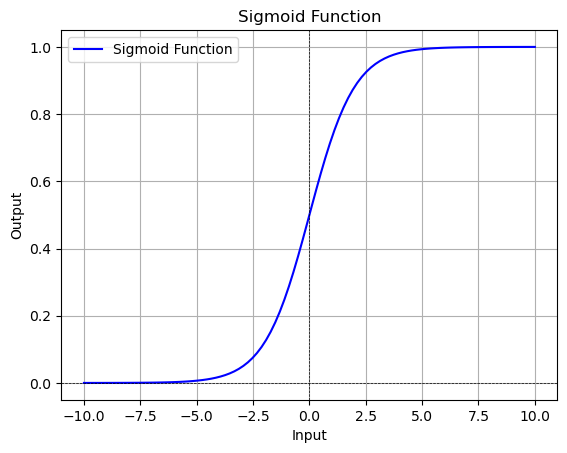

In [51]:
# use Matplotlib to plot a graph of sigmoid
# Look up an online tutorial for a simple example
# Generate input values for plotting
x = np.linspace(-10, 10, 100)  # 100 points from -10 to 10
y = sigmoid(x)                  # Calculate sigmoid for each x value

# Plot the sigmoid function
plt.plot(x, y, label='Sigmoid Function', color='blue')
plt.title('Sigmoid Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid()
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.show()